In [1]:
import sys
sys.path.append('..')
%matplotlib inline

#Geometrical Decision Vector Strategy behavior

In [2]:
from lib import ngdb
import numpy as np
import seaborn as sns

In [3]:
db=ngdb.NamingGamesDB("graph3.db")

In [4]:
nb_iter = 4
values = [1.33, 1.5, 1.7, 2]
Tmax=10000

In [5]:
xp_base_cfg = {
    'pop_cfg':{
        'voc_cfg':{
            'voc_type':'sparse_matrix',
            'M':20,
            'W':20
            },
        'strat_cfg':{
            'strat_type':'decision_vector',
            'decision_vector':[]
            },
        'nbagent':20
        },
    'step':Tmax/100
    }

def xp_cfg_geom(r):
    M = xp_base_cfg['pop_cfg']['voc_cfg']['M']
    tempdecvec=[0]*(M+1)
    tempdecvec[0]=1
    for i in range(1,int(np.log(M)/np.log(r))+1):
        tempdecvec[int(-1-M/(r**i))]=1
    xp_base_cfg['pop_cfg']['strat_cfg']['decision_vector'] = tempdecvec
    return xp_base_cfg

/usr/local/lib/python2.7/dist-packages/numpy/core/fromnumeric.py:2507: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)
/usr/lib/pymodules/python2.7/matplotlib/axes.py:4747: UserWarning: No labeled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labeled objects found. "


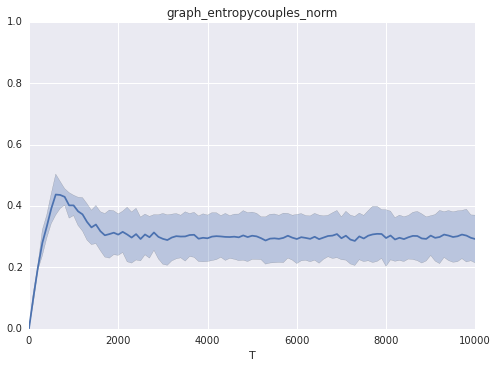

In [6]:
def graph_iter(r):
    graph_list = []
    uuid_list = []
    for i in range(nb_iter):
        exp = db.get_experiment(blacklist=uuid_list, **xp_cfg_geom(r))
        exp.continue_exp_until(Tmax)
        uuid_list.append(exp.uuid)
        graph_list.append(exp.graph('entropycouples_norm', tmax=Tmax))
    graph=graph_list[0]
    for i in range(1, nb_iter):
        graph.add_graph(graph_list[i])
    graph.merge()
    return graph

graph=graph_iter(values[0])
graph.show()

In [7]:
for i in range(1,len(values)):
    graph.add_graph(graph_iter(values[i]))

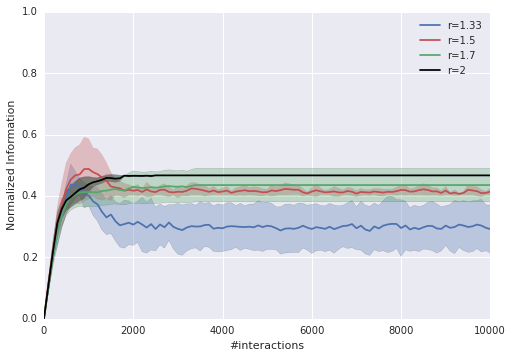

In [8]:
graph.title = ''
graph.xlabel = '#interactions'
graph.ylabel = 'Normalized Information'

for i in range(len(graph.Yoptions)):
    graph.Yoptions[i] = {'label':'r={}'.format(str(values[i]))}
    
#graph.Yoptions[0]['color'] = ''
graph.Yoptions[1]['color'] = sns.color_palette()[2]
#graph.Yoptions[2]['color'] =
graph.Yoptions[3]['color'] = 'black'
    
#graph.legendoptions['bbox_to_anchor'] = (0,0,0.4,0.8)

graph.show()